<a href="https://colab.research.google.com/github/Antonio-Belo/MVP-ABBP/blob/main/MVP_ADBP_Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sprint I  - Análise de Dados e Boas Práticas**

>*Data Science & Analytics - PUC Rio*

>*Antonio Carlos Avallone Belo*

## **1. Definição do Problema**

O dataset usado será o **Data Science Salaries 2023** (Salaries of Different Data Science Fields in the Data Science Domain)

<h4 align="justify"> O objetivo desta análise é examinar quais são os factores e as suas complexas interligações com o objetivo de prever com precisão os resultados salariais. Este estudo procura fornecer informações valiosas sobre as actuais trajectórias salariais no domínio da ciência dos dados, estabelecendo simultaneamente uma base sólida para futuras explorações sobre o impacto de factores determinantes como o nível de experiência, o tipo de emprego, a dimensão da empresa e a localização geográfica nas estruturas salariais desta profissão em rápida evolução.  </i>
<a> Consulte: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023




*   **work_year** [categorico]  -> <i align="justify">Representa o ano específico em que o salário foi pago. Anos diferentes podem ter condições económicas diferentes que podem ter impacto no nível salarial. </i>

*   **experience_level** [categórico] -> <i align="justify">O nível de experiência que uma pessoa tem num determinado emprego. Trata-se de um fator determinante no cálculo do salário, dado que, normalmente, os indivíduos mais experientes recebem salários mais elevados devido às suas competências e conhecimentos avançados. </i>

*   **employment_type** [categorico] -> <i align="justify">A natureza do contrato de trabalho, como tempo inteiro, tempo parcial ou contrato, pode influenciar grandemente o salário. Os empregados a tempo inteiro têm frequentemente salários anuais mais elevados em comparação com os seus colegas de tempo parcial ou contratuais. </i>

*   **job_title** [categórico]: <i align="justify">A função que um indivíduo desempenha numa empresa. As diferentes funções têm diferentes escalas salariais com base nas responsabilidades e competências exigidas. Por exemplo, as funções de gestão pagam normalmente mais do que as posições de nível de entrada. </i>

*   **salário** [numérico] : <i align="justify">O salário bruto total pago ao indivíduo. Este é diretamente influenciado por fatores como o nível de experiência, o cargo e o tipo de emprego. </i>

*  **salary_currency** [categorical] : <i align="justify">A moeda específica em que o salário é pago, indicada por um código ISO 4217. As taxas de câmbio podem afetar o valor do salário quando convertido em diferentes moedas.</i>

*   **salaryinusd** [numérico] : <i align="justify">O montante total do salário bruto convertido em dólares americanos. Isto permite uma comparação uniforme dos salários em diferentes países e moedas. </i>

*   **employee_residence** [categórico]: <i align="justify">O país principal de residência do empregado, indicado por um código ISO 3166. O custo de vida e as taxas salariais prevalecentes no país de residência do empregado podem afetar os níveis salariais. </i>

*   **remote_ratio** : <i align="justify">A proporção de trabalho efetuado remotamente. Com o aumento do trabalho remoto, as empresas podem ajustar os salários com base no custo de vida na localização do empregado e na proporção de trabalho remoto. </i>

*   **company_location** [categorical]:<i align="justify"> A localização do escritório principal do empregador ou da sucursal que detém o contrato. As empresas em diferentes localizações podem oferecer diferentes tabelas salariais devido a diferentes condições económicas e custo de vida.</i>

*  **company_size**  [categórico]: <i align="justify">O número médio de trabalhadores da empresa durante o ano de trabalho. As empresas maiores têm frequentemente tabelas salariais estruturadas e podem oferecer salários mais elevados devido a economias de escala e a maiores fluxos de receitas. </i>



  












<h4><b>Domínios variáveis categóricas</b>


**company_size** - **Porte**

|Código|Descrição|
|---|---|
|L|Grande|
|M|Média|
|S|Pequena|

**experience_level** - **experiencia**

|Código|Descrição|
|---|---|
|EN|Nivel Júnior|
|EX|Nível Executivo|
|MI|Nível Pleno|
|SE|Nível Senior|

**employment_type** - **tp_emprego**

|Código|Descrição|
|---|---|
|CT|Contrato|
|FL|Free Lancer|
|FT|Full Time|
|PT|PArt Time|





In [347]:
# @title Texto de título padrão
# Imports
import pandas                as pd
import numpy                 as np
import matplotlib            as mp
import matplotlib.pyplot     as plt
import seaborn               as sns
import missingno             as ms                 # para tratamento de missings
import plotly.express        as px                 # plotar mapas
import matplotlib.pyplot     as plt
#
from matplotlib              import cm
from pandas                  import set_option
from pandas.plotting         import scatter_matrix
from sklearn.preprocessing   import MinMaxScaler   # normalização
from sklearn.preprocessing   import StandardScaler # padronização
from sklearn.preprocessing   import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing   import OneHotEncoder  # one-hot e dummy encoding
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import classification_report
from sklearn.tree            import DecisionTreeClassifier


In [348]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


## **2. Carga de Dados**



In [349]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Antonio-Belo/MVP-ABBP/main/ds_salaries.csv"

# Renomeando as colunas
new_columns = {
    'work_year'         : 'ano',
    'experience_level'  : 'experiencia',
    'employment_type'   : 'tp_emprego',
    'job_title'         : 'cargo',
    'salary'            : 'salario',
    'salary_currency'   : 'moeda',
    'salary_in_usd'     : 'salario_usd',
    'employee_residence': 'residencia',
    'remote_ratio'      : 'remoto_perc',
    'company_location'  : 'local_job',
    'company_size'      : 'porte'
}

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=new_columns, skiprows=1, delimiter=',')
dataset.rename(columns=new_columns, inplace=True)

In [350]:
dataset.head()

,ano,experiencia,tp_emprego,cargo,salario,moeda,salario_usd,residencia,remoto_perc,local_job,porte
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## **3. Análise de Dados**





### **3.1. Estatísticas Descritivas**

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [351]:
# Mostra as dimensões do dataset
print(dataset.shape)

(3755, 11)


In [352]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ano          3755 non-null   int64 
 1   experiencia  3755 non-null   object
 2   tp_emprego   3755 non-null   object
 3   cargo        3755 non-null   object
 4   salario      3755 non-null   int64 
 5   moeda        3755 non-null   object
 6   salario_usd  3755 non-null   int64 
 7   residencia   3755 non-null   object
 8   remoto_perc  3755 non-null   int64 
 9   local_job    3755 non-null   object
 10  porte        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


In [353]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,ano,experiencia,tp_emprego,cargo,salario,moeda,salario_usd,residencia,remoto_perc,local_job,porte
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [354]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,ano,experiencia,tp_emprego,cargo,salario,moeda,salario_usd,residencia,remoto_perc,local_job,porte
3745,2021,SE,FT,Director of Data Science,168000,USD,168000,JP,0,JP,S
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
3748,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [355]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes


ano             int64
experiencia    object
tp_emprego     object
cargo          object
salario         int64
moeda          object
salario_usd     int64
residencia     object
remoto_perc     int64
local_job      object
porte          object
dtype: object

In [356]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,ano,salario,salario_usd,remoto_perc
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [357]:
# Domínios
print('Ano de Trabalho')
print(dataset['ano'].unique())
print(dataset.groupby('ano').size())
print('-------------------------------------')
print('Experiencia')
print(dataset['experiencia'].unique())
print(dataset.groupby('experiencia').size())
print('-------------------------------------')
print('Tamanho da Empresa')
print(dataset['porte'].unique())
print(dataset.groupby('porte').size())
print('-------------------------------------')
print('Tipo Enprego')
print(dataset['tp_emprego'].unique())
print('Local de Residência')
print(dataset['residencia'].unique())
print('Local Trabalho Sede')
print(dataset['local_job'].unique())

Ano de Trabalho
[2023 2022 2020 2021]
ano
2020      76
2021     230
2022    1664
2023    1785
dtype: int64
-------------------------------------
Experiencia
['SE' 'MI' 'EN' 'EX']
experiencia
EN     320
EX     114
MI     805
SE    2516
dtype: int64
-------------------------------------
Tamanho da Empresa
['L' 'S' 'M']
porte
L     454
M    3153
S     148
dtype: int64
-------------------------------------
Tipo Enprego
['FT' 'CT' 'FL' 'PT']
Local de Residência
['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT']
Local Trabalho Sede
['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 

In [358]:
# distribuição do Porte da Empresa

print(dataset.groupby('porte').size())
print('-------------------------------------')
print(dataset.groupby('tp_emprego').size())
print('-------------------------------------')
print(dataset.groupby('cargo').size())
print('-------------------------------------')
print(dataset.groupby('moeda').size())
print('-------------------------------------')
print(dataset.groupby('remoto_perc').size())
print('-------------------------------------')



porte
L     454
M    3153
S     148
dtype: int64
-------------------------------------
tp_emprego
CT      10
FL      10
FT    3718
PT      17
dtype: int64
-------------------------------------
cargo
3D Computer Vision Researcher      4
AI Developer                      11
AI Programmer                      2
AI Scientist                      16
Analytics Engineer               103
                                ... 
Research Engineer                 37
Research Scientist                82
Software Data Engineer             2
Staff Data Analyst                 1
Staff Data Scientist               1
Length: 93, dtype: int64
-------------------------------------
moeda
AUD       9
BRL       6
CAD      25
CHF       4
CLP       1
CZK       1
DKK       3
EUR     236
GBP     161
HKD       1
HUF       3
ILS       1
INR      60
JPY       3
MXN       1
PLN       5
SGD       6
THB       2
TRY       3
USD    3224
dtype: int64
-------------------------------------
remoto_perc
0      1923
50      18

### **3.2. Visualizações Unimodais**

In [359]:
dataset['experiencia'] = dataset['experiencia'].replace('EN','Junior')
dataset['experiencia'] = dataset['experiencia'].replace('MI','Pleno')
dataset['experiencia'] = dataset['experiencia'].replace('SE','Senior')
dataset['experiencia'] = dataset['experiencia'].replace('EX','Executivo')

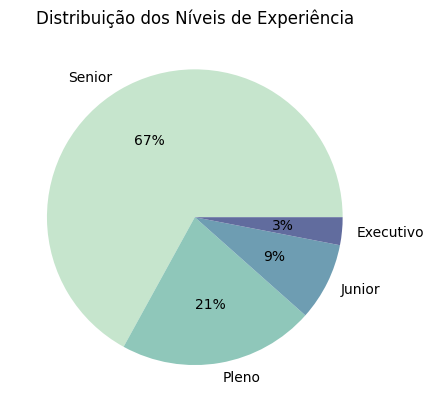

In [360]:
colors = sns.cubehelix_palette(start=.8, rot=-.7)
experience_vals = dataset['experiencia'].value_counts()
plt.pie(experience_vals, labels = experience_vals.index.to_list(), colors = colors, autopct='%.0f%%')
plt.title('Distribuição dos Níveis de Experiência')
plt.show()

Vamos criar agora um histograma para cada atributo do dataset. Veremos que os atributos age, pedi e test seguem uma distribuição exponencial, e que as colunas mass e press seguem uma distribuição aproximadamente normal.

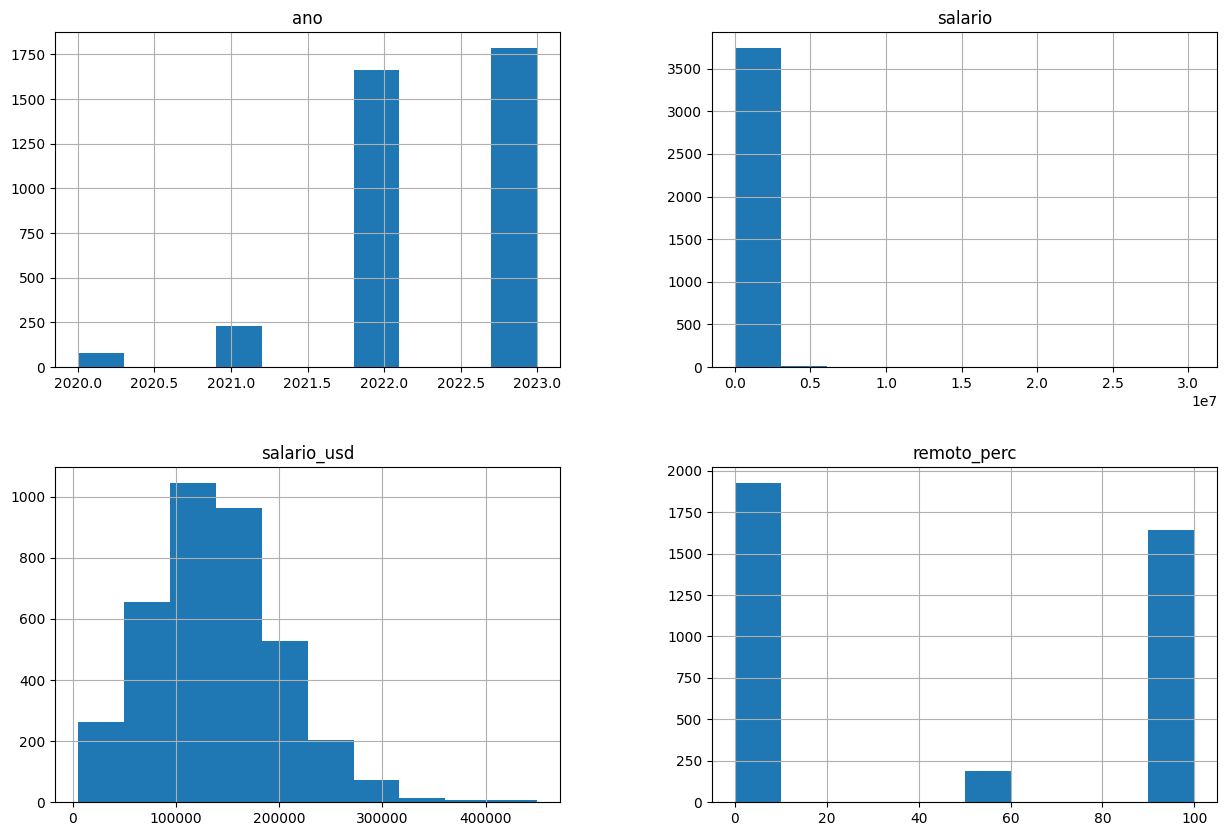

In [361]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

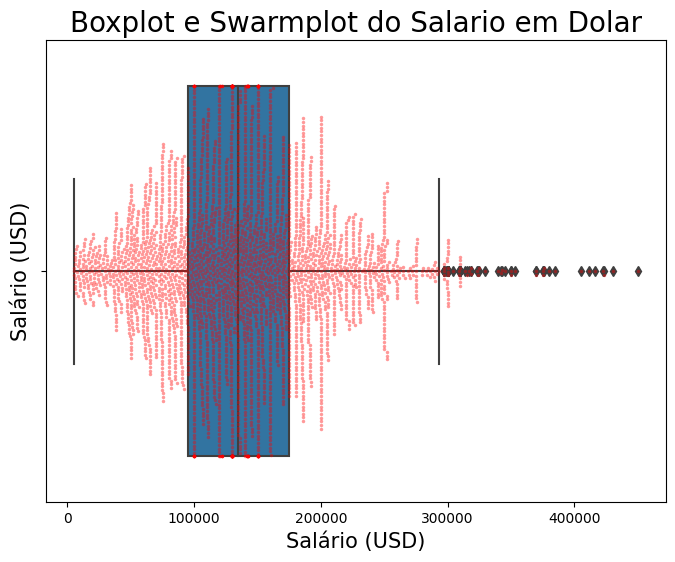

In [362]:
# Criação do boxplot e swarmplot da coluna   'salario_usd'
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['salario_usd'])
sns.swarmplot(x=dataset['salario_usd'], color='red', alpha=0.4, size=2.5)
plt.ylabel('Salário (USD)',fontsize=15)
plt.xlabel('Salário (USD)',fontsize=15)
plt.title('Boxplot e Swarmplot do Salario em Dolar',fontsize=20)
plt.show()

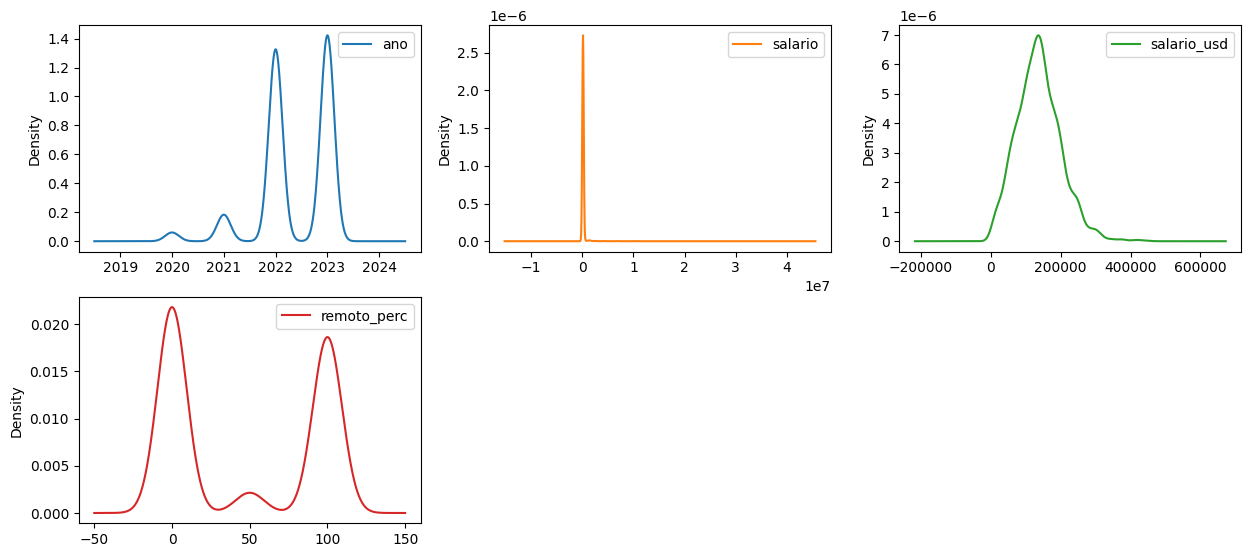

In [363]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()


Vamos agora trabalhar com boxplots. No boxblot, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

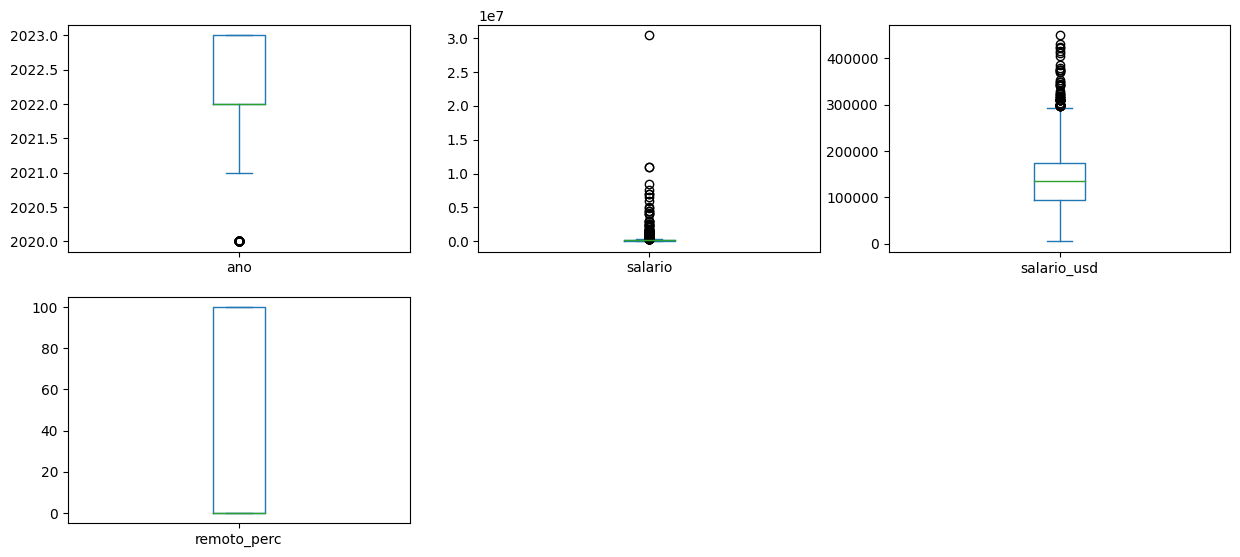

In [364]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

In [365]:
country_mapping = {
    'BR': 'Brazil','US': 'United States',
    'EU': 'European Union','IN': 'India',
    'HK': 'Hong Kong','PT': 'Portugal',
    'ES': 'Spain','CA': 'Canada',
    'CF': 'Central African Republic',
    'BE': 'Belgium','BA': 'Bosnia and Herzegovina',
    'AU': 'Australia','AT': 'Austria',
    'AS': 'American Samoa','DE': 'Germany',
    'GB': 'United Kingdom','AE': 'United Arab Emirates',
    'AM': 'Armenia','AR': 'Argentina',
    'DZ': 'Algeria','EE': 'Estonia',
    'EG': 'Egypt','FI': 'Finland',
    'FR': 'France','BG': 'Bulgaria',
    'BO': 'Bolivia','CH': 'Switzerland',
    'CL': 'Chile','CN': 'China',
    'CO': 'Colombia','CR': 'Costa Rica',
    'CY': 'Cyprus','CZ': 'Czech Republic',
    'DK': 'Denmark','GH': 'Ghana',
    'GR': 'Greece','HN': 'Honduras',
    'HR': 'Croatia','HU': 'Hungary',
    'ID': 'Indonesia','IE': 'Ireland',
    'IL': 'Israel','IQ': 'Iraq'
    }

In [366]:
# Mapear as localidades de 'local_job' para os países sede
import plotly.express as px

# Mapear as localidades de 'company_location' para os países sede
dataset['local_job'] = dataset['local_job'].map(country_mapping)

# Contar a quantidade de ocorrências de cada país na coluna 'company_location'
country_counts = dataset['local_job'].value_counts().reset_index()

# Renomear as colunas
country_counts.columns = ['local_job', 'count']

# Criar o gráfico de mapa
fig = px.choropleth(
    data_frame=country_counts,
    locations='local_job',
    locationmode='country names',
    color='count',
    color_continuous_scale='YlOrRd',
    range_color=(0, 100),
    labels={'count': 'Count'},
    title='Distribuição de Empregador por País'
)

# Exibir o gráfico
fig.show()

In [367]:
top_10_titles = dataset.groupby('cargo')['salario_usd'].mean().sort_values(ascending=False)[:10]

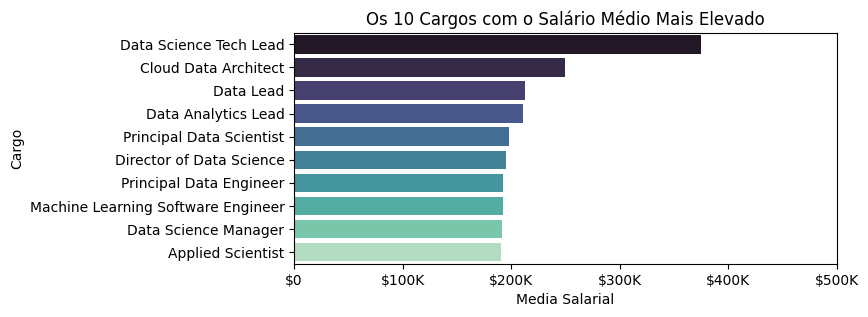

In [368]:
# Os 10 Cargos com o Salário Médio Mais Elevado
fig, axs = plt.subplots(figsize=(7, 3))
colors = sns.color_palette("mako", 10)

# get top 10 job titles with highest mean salary
top_10_titles = dataset.groupby('cargo')['salario_usd'].mean().sort_values(ascending=False)[:10]

sns.barplot(x=top_10_titles.values, y=top_10_titles.index, ax=axs, palette=colors)
axs.set_title('Os 10 Cargos com o Salário Médio Mais Elevado')
axs.set_xlabel('Media Salarial')
axs.set_ylabel('Cargo')
axs.set_xticks([0, 100000, 200000, 300000, 400000, 500000])
axs.set_xticklabels(['$0', '$100K', '$200K', '$300K', '$400K', '$500K'])
plt.show()

### **3.3. Visualizações Multimodais**

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A covariância representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:

Próximo de -1 : há uma correlação negativa entre as variáveis,
Próximo de +1: há uma correlação positiva entre as variáveis.
0: não há correlação entre as variáveis.
OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.

Falamos anteriormente da importância da correlação entre os atributos, e agora iremos visualizar esta informação em formato gráfico. A matriz de correlação exibe graficamente a correlação entre os atributos numéricos do dataset.estão mais distantes um do outro na ordenação.

O código a seguir exibe a matriz de correlação.

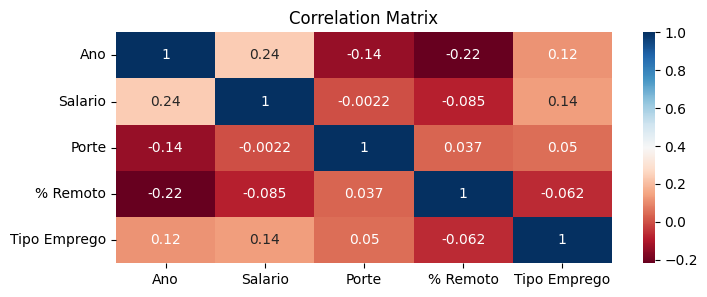

In [411]:
# transform company size to numerical values
dataset['porte'] = dataset['porte'].replace('S', 1)
dataset['porte'] = dataset['porte'].replace('M', 2)
dataset['porte'] = dataset['porte'].replace('L', 3)
#
dataset['experiencia'] = dataset['experiencia'].replace('EN', 1)
dataset['experiencia'] = dataset['experiencia'].replace('MI', 2)
dataset['experiencia'] = dataset['experiencia'].replace('SE', 3)
dataset['experiencia'] = dataset['experiencia'].replace('EX', 4)
#
dataset['tp_emprego'] = dataset['tp_emprego'].replace('PT', 1)
dataset['tp_emprego'] = dataset['tp_emprego'].replace('FL', 2)
dataset['tp_emprego'] = dataset['tp_emprego'].replace('CT', 3)
dataset['tp_emprego'] = dataset['tp_emprego'].replace('FT', 4)
#

# plot correlation matrix between ano, salario, porte, experiencia
fig, axs = plt.subplots(figsize=(8, 3))
corr = dataset[['ano', 'salario_usd', 'porte', 'remoto_perc', 'tp_emprego']].corr()
sns.heatmap(corr, annot=True, ax=axs, cmap='RdBu')
axs.set_title('Correlation Matrix')
axs.set_xticklabels(['Ano', 'Salario', 'Porte', '% Remoto', 'Tipo Emprego'])
axs.set_yticklabels(['Ano', 'Salario', 'Porte', '% Remoto', 'Tipo Emprego'], rotation=0)
plt.show()


<i align="justified">O salário está positivamente correlacionado com o ano de trabalho, o que significa que os salários aumentaram desde 2020. O ano de trabalho está negativamente correlacionado com o trabalho remoto, uma vez que os trabalhadores começaram a regressar ao escritório após a pandemia. </i>

Por sua vez, o gráfico de dispersão (scatter plot) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

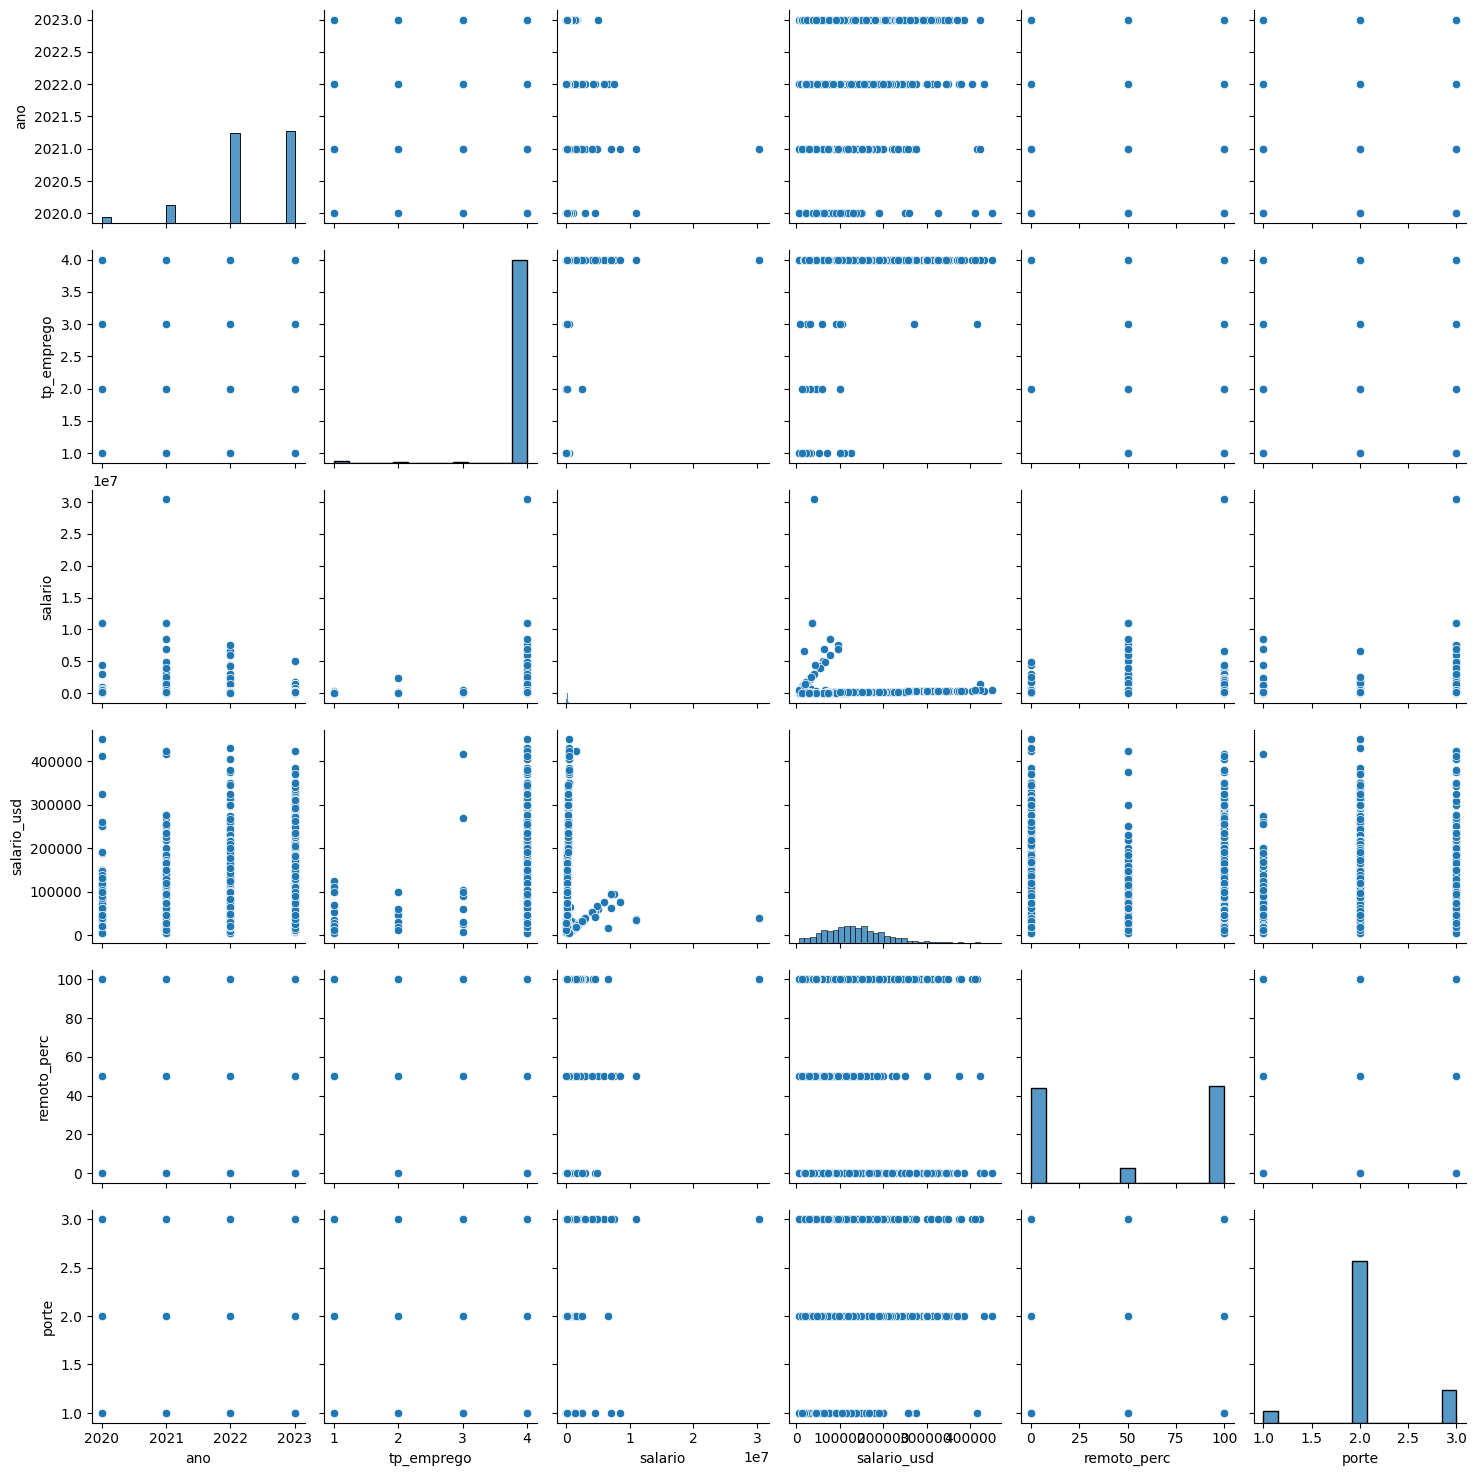

In [413]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(dataset)

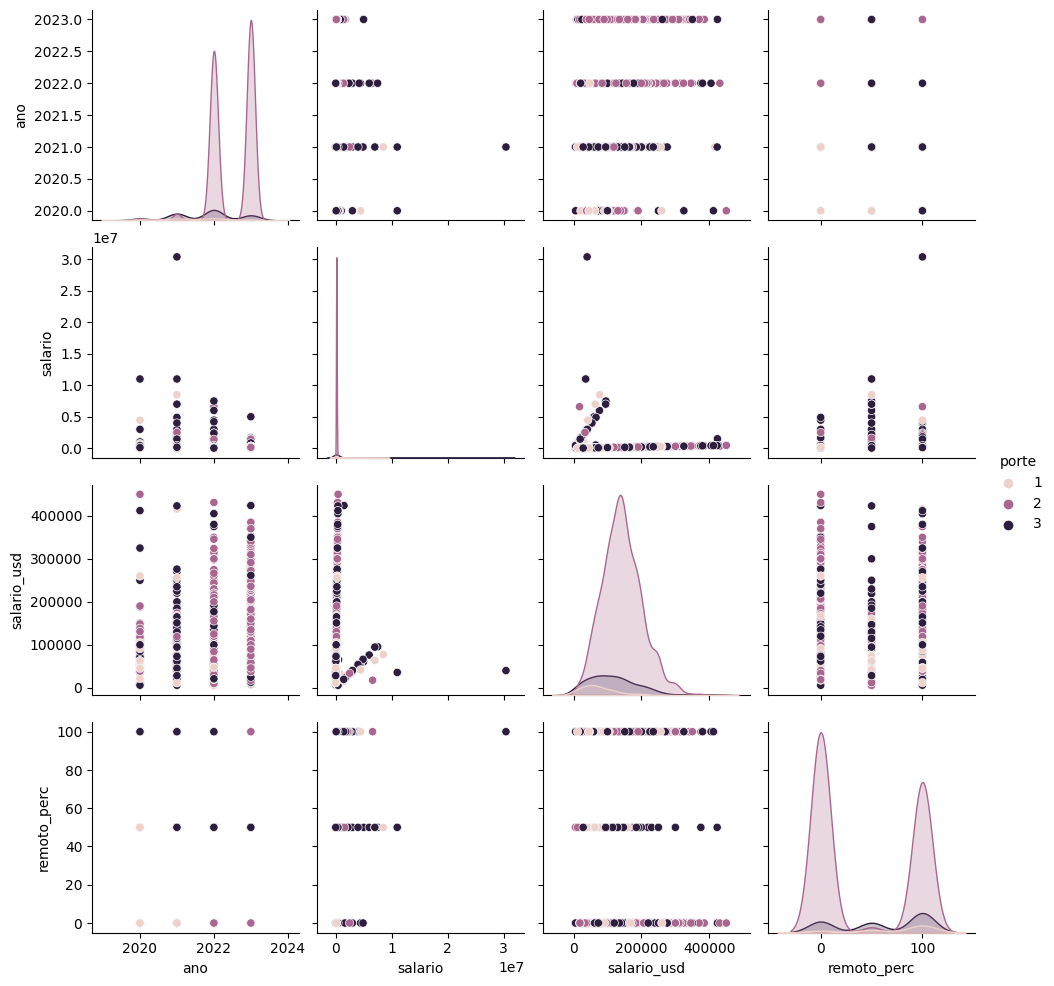

In [372]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(dataset, hue = "porte", height = 2.5);

## **4. Pré-Processamento de dados**

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### **4.1. Tratamento de Missings e Limpeza**

**Verificar Linhas Duplicatas**

In [373]:
duplicate_rows = dataset[dataset.duplicated()]
duplicate_rows.shape

(1171, 11)

In [374]:
# Limpeza das linhas duplicatas
dataset.drop_duplicates(keep='last', inplace = True)
dataset.shape

(2584, 11)

**Verificar missings**


In [375]:
# verificando nulls no dataset
dataset.isnull().sum()

ano              0
experiencia      0
tp_emprego       0
cargo            0
salario          0
moeda            0
salario_usd      0
residencia       0
remoto_perc      0
local_job      103
porte            0
dtype: int64

<Axes: >

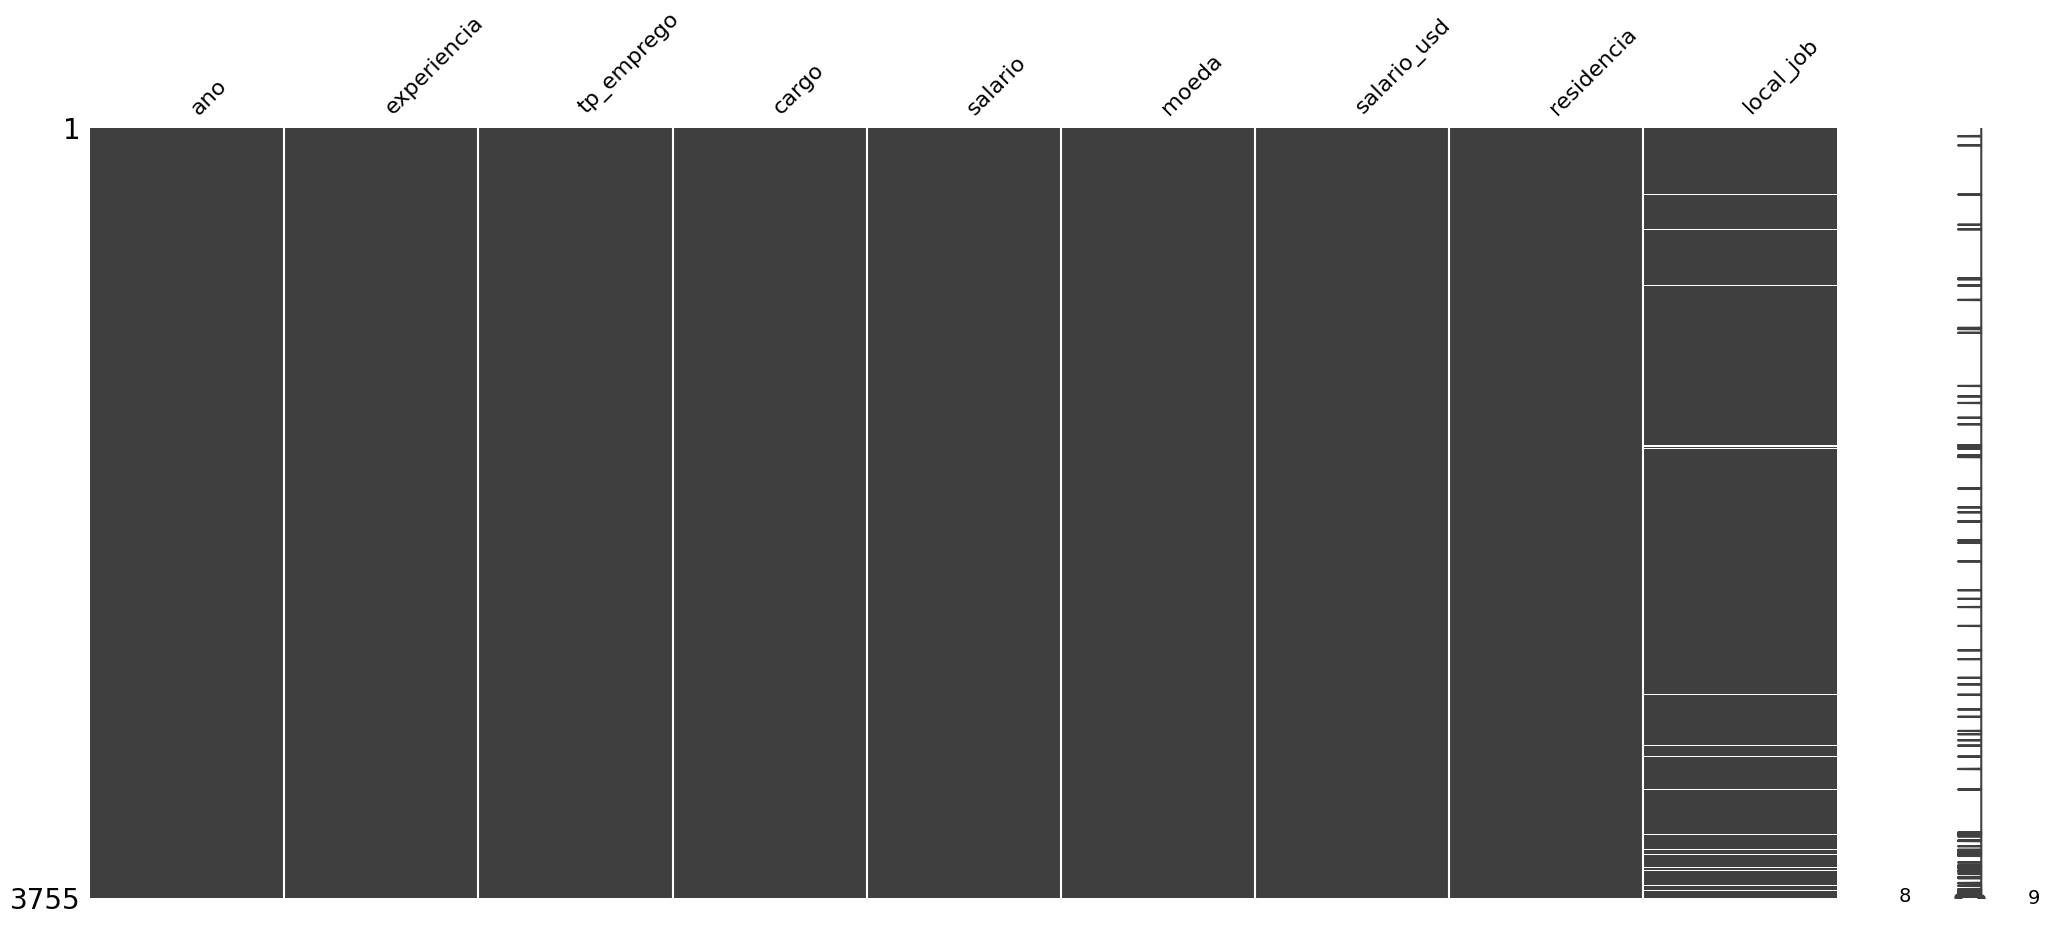

In [376]:
# salvando um NOVO dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(dataset.columns)

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

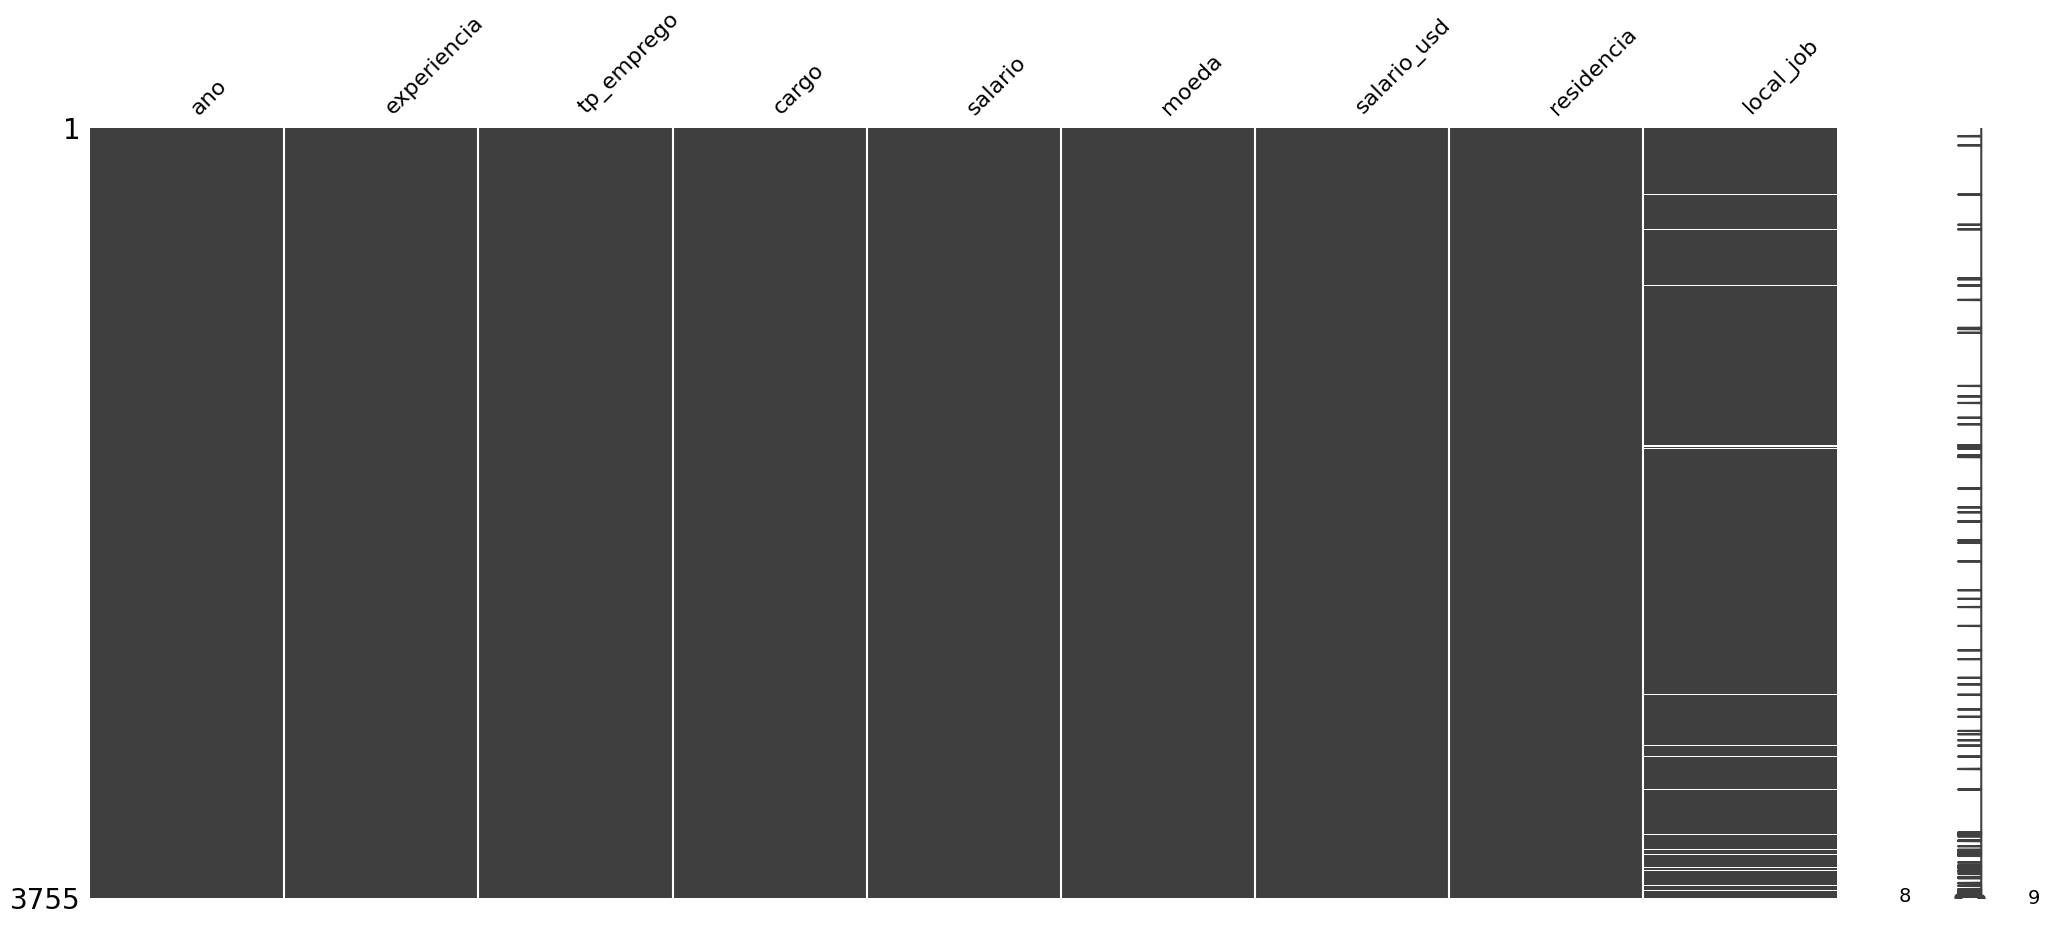

In [377]:
# removendo as colunas 'Remoto %'
# atributos.drop(['remoto_perc'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

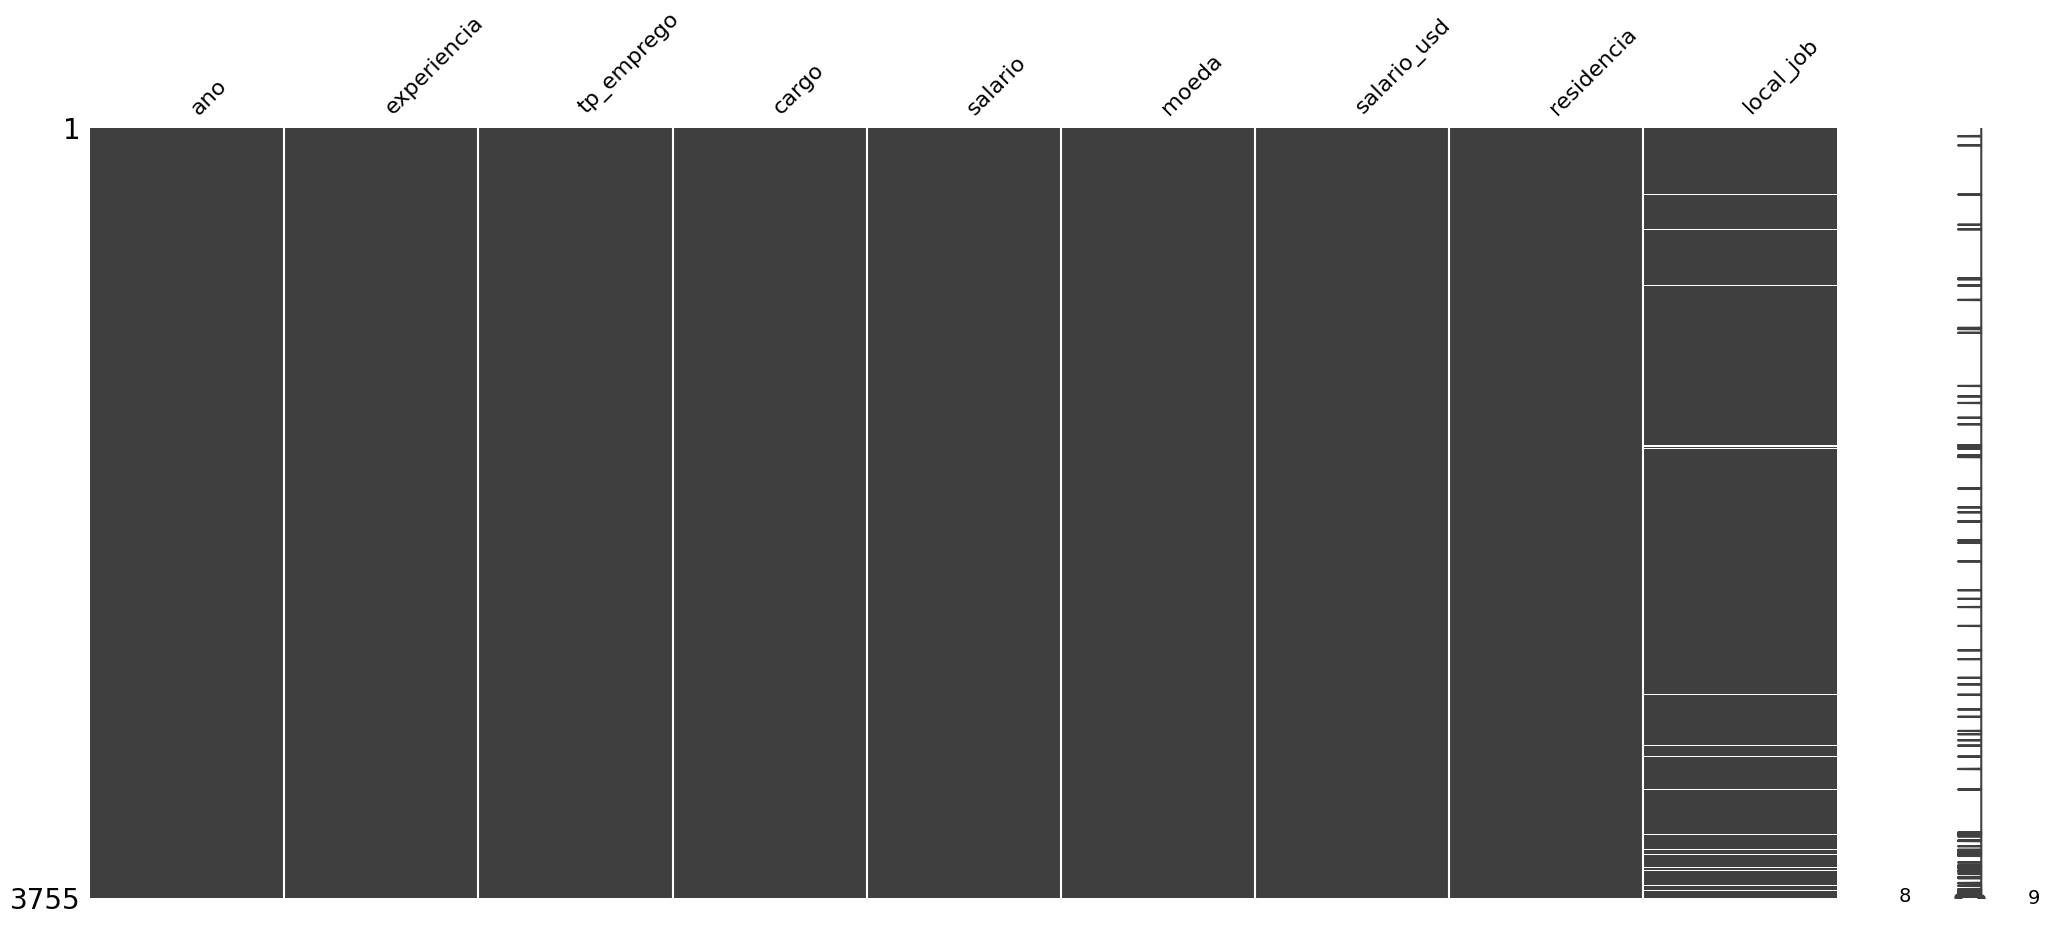

In [378]:
# substituindo os NaN de 'plas', 'pres'e 'mass' pela mediana da coluna
atributos['salario_usd'].fillna(atributos['salario_usd'].median(), inplace=True)
atributos['salario'].fillna(atributos['salario'].median(), inplace=True)


# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [379]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'class' no novo dataset
datasetSemMissings['class'] = dataset['class']

# exibindo as primeiras linhas
datasetSemMissings.head()

KeyError: ignored

### **4.2. Separação em conjunto de treino e conjunto de teste**

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

In [ ]:

test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:8]
y = array[:,8]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [ ]:

# Separação em conjuntos de treino e teste (dataset sem missings - 2 colunas a menos!)
array = datasetSemMissings.values
X_sm = array[:,0:6]
y_sm = array[:,6]
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação

## **Conclusão**

Neste MVP foi possível verificar que... [escreva aqui os seu principais achados, pontos de atenção, etc.]